Using TensorFlow backend.


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
Hidden-1 (Dense)             (None, 4)                 12        
_________________________________________________________________
Hidden-2 (Dense)             (None, 4)                 20        
_________________________________________________________________
Output_layer (Dense)         (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________
Train on 700 samples, validate on 300 samples
Epoch 1/100
700/700 [==============================] - 0s 605us/step - loss: 0.6926 - accuracy: 0.5300 - val_loss: 0.6735 - val_accuracy: 0.6467
Epoch 2/100
700/700 [==============================] - 0s 53us/step - 

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


700/700 [==============================] - 0s 59us/step - loss: 0.5463 - accuracy: 0.7286 - val_loss: 0.5567 - val_accuracy: 0.6967
Epoch 8/100
700/700 [==============================] - 0s 53us/step - loss: 0.5345 - accuracy: 0.7271 - val_loss: 0.5767 - val_accuracy: 0.6967
Epoch 9/100
700/700 [==============================] - 0s 54us/step - loss: 0.5207 - accuracy: 0.7471 - val_loss: 0.5450 - val_accuracy: 0.7000
Epoch 10/100
700/700 [==============================] - 0s 60us/step - loss: 0.5140 - accuracy: 0.7443 - val_loss: 0.5507 - val_accuracy: 0.7033
Epoch 11/100
700/700 [==============================] - 0s 61us/step - loss: 0.5188 - accuracy: 0.7329 - val_loss: 0.5558 - val_accuracy: 0.6867
Epoch 12/100
700/700 [==============================] - 0s 55us/step - loss: 0.5404 - accuracy: 0.7286 - val_loss: 0.5685 - val_accuracy: 0.7000
Epoch 13/100
700/700 [==============================] - 0s 56us/step - loss: 0.5179 - accuracy: 0.7357 - val_loss: 0.5465 - val_accuracy: 0.7033


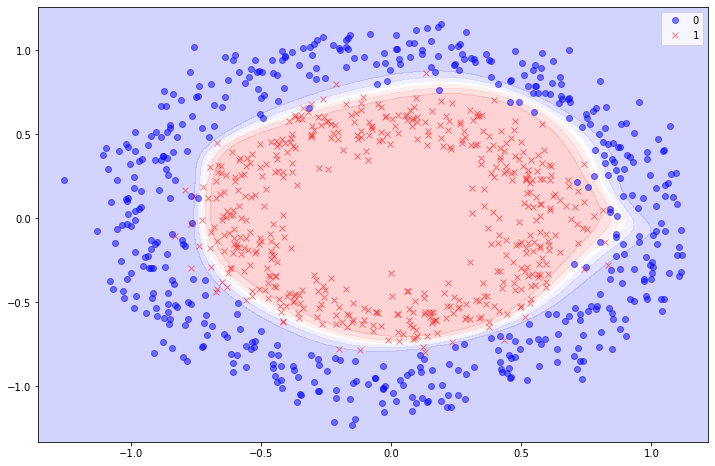

In [ ]:
#   deep_circles.py
#   Defines a network that can find separate circles of data
#

#   Imports
from sklearn.datasets import make_circles
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]="2"

#   Helper functions

#   plot the data on a figure
def plot_data(pl, X, y):
    # plot class where y==0
    pl.plot(X[y==0, 0], X[y==0,1], 'ob', alpha=0.5)
    # plot class where y==1
    pl.plot(X[y==1, 0], X[y==1,1], 'xr', alpha=0.5)
    pl.legend(['0', '1'])
    return pl

#   Common function that draws the decision boundaries
def plot_decision_boundary(model, X, y):

    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    # make prediction with the model and reshape the output so contourf can plot it
    c = model.predict(ab)
    Z = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    # plot the contour
    plt.contourf(aa, bb, Z, cmap='bwr', alpha=0.2)
    # plot the moons of data
    plot_data(plt, X, y)

    return plt


# Generate some data blobs.  Data will be either 0 or 1 when 2 is number of centers.
# X is a [number of samples, 2] sized array. X[sample] contains its x,y position of the sample in the space
# ex: X[1] = [1.342, -2.3], X[2] = [-4.342, 2.12]
# y is a [number of samples] sized array. y[sample] contains the class index (ie. 0 or 1 when there are 2 centers)
# ex: y[1] = 0 , y[1] = 1
X, y = make_circles(n_samples=1000, factor=.6, noise=0.1, random_state=42)
#pl = plot_data(plt, X, y)
#pl.show()

# Split the data into Training and Test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the keras model
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# #   Simple Sequential model
# model = Sequential()
# model.add(Dense(4, input_shape=(2,), activation="tanh",  name="Hidden-1"))
# model.add(Dense(4, activation="tanh", name="Hidden-2"))
# #   Add a Dense Fully Connected Layer with 1 neuron.  Using input_shape = (2,) says the input will 
# #       be arrays of the form (*,2).  The first dimension will be an unspecified 
# #       number of batches (rows) of data.  The second dimension is 2 which are the X, Y positions of each data element.
# #       The sigmoid activation function is used to return 0 or 1, signifying the data 
# #       cluster the position is predicted to belong to.
# model.add(Dense(1, activation="sigmoid", name="Output_layer"))
#
#   Implement as Functional API
from keras.models import Model
from keras.layers import Input
#
inputs = Input(shape=(2,))
#   Hidden layers
x = Dense(4, activation="tanh",  name="Hidden-1")(inputs)
x = Dense(4, activation="tanh", name="Hidden-2")(x)
#   Output Layer
o = Dense(1, activation="sigmoid", name="Output_layer")(x)
#   Create Model and specify the input and output
model = Model(inputs=inputs, outputs=o)
#   Display summary
model.summary()
#   Compile the model.  Minimize crossentopy for a binary.  Maximize for accuracy
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])
from keras.utils import plot_model
plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)
#   Define early stopping callback
from keras.callbacks import EarlyStopping
my_callbacks = [EarlyStopping(monitor='val_acc', patience=5, mode='max')]
#   Fit the model with the data.  Make 100 cycles through the data.
#       Set verbose to 0 to supress progress messages 
model.fit(X_train, y_train, epochs=100, verbose=1, callbacks=my_callbacks, validation_data=(X_test, y_test) )
#   Get loss and accuracy on test data
eval_result = model.evaluate(X_test, y_test)
#   Print test accuracy
print("\n\nTest loss:", eval_result[0], "Test accuracy:", eval_result[1])
#   Plot the decision boundary
plot_decision_boundary(model, X, y).show()

300/300 [==============================] - 0s 88us/step


Test loss: 0.0009862010165428122 Test accuracy: 1.0


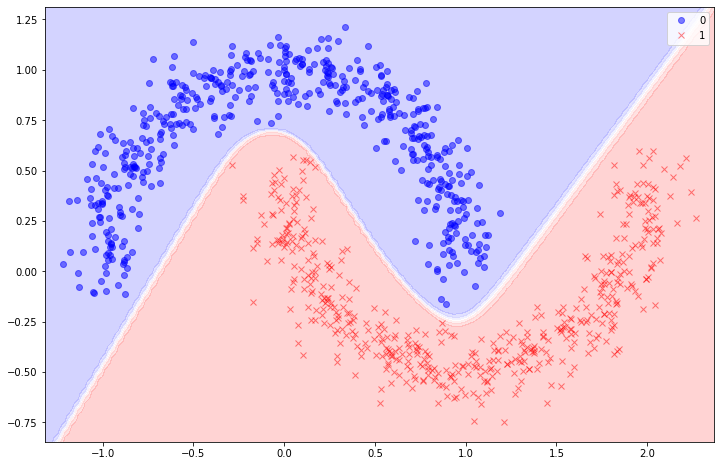

In [ ]:
#   deep_moon.py
#   Defines a network that can find separate data of moon shapes
#

#   Imports
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb                 # make plot look pretty

# Helper functions
#   plot the moons only on a figure
def plot_moons(pl, X, y):
    # plot half moon for class where y==0
    pl.plot(X[y==0, 0], X[y==0,1], 'ob', alpha=0.5)
    # plot half moon for class where y==1
    pl.plot(X[y==1, 0], X[y==1,1], 'xr', alpha=0.5)
    pl.legend(['0', '1'])
    return pl
    
    

def plot_decision_boundary(model, X, y):

    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    # print("amin:", amin)
    # print("amax:", amax)
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    # make prediction with the model and reshape the output so contourf can plot it
    # print("ab:", ab)
    c = model.predict(ab)
    Z = c.reshape(aa.shape)
    # print("Z shape:", Z.shape)
    # print("Z[0,]:")
    # print(Z[0,])

    plt.figure(figsize=(12, 8))
    # plot the contour
    plt.contourf(aa, bb, Z, cmap='bwr', alpha=0.2)
    # plot the moons of data
    plot_moons(plt, X, y)

    return plt


# Generate some data moons.  Data will be either 0 or 1 and in two "cresent moon" shapes.
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)
#pl = plot_moons(plt, X, y)
#pl.show()

# Split the data into Training and Test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the keras model
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# 1 Hidden Layer Model
#   Simple Sequential model
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation="tanh"))
model.add(Dense(2, activation="tanh"))
#   Add a Dense Fully Connected Layer with 1 neuron and the sigmoid activation function
#   return 0 or 1 signifying which moon the predicted value belongs to
model.add(Dense(1, activation="sigmoid"))
#   compile the model.  Minimize crossentopy for a binary.  Maximize accuracy
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])
#   fit the model with the data from make_moons
model.fit(X_train, y_train, epochs=100, verbose=0)

#   Get loss and accuracy on test data
eval_result = model.evaluate(X_test, y_test)
#   Print test accuracy
print("\n\nTest loss:", eval_result[0], "Test accuracy:", eval_result[1])

plot_decision_boundary(model, X, y).show()


# # 2 Deeper Sequential model
# model = Sequential()
# #   Add a Dense Layer with 4 neurons and the tanh activation function
# model.add(Dense(4, input_shape=(2,), activation="tanh"))
# #   Add a Dense Layer with 2 neurons and the tanh activation function
# model.add(Dense(2, activation="tanh"))
# #   Add a Dense Layer with 1 nueron and the sigmoid activation function
# model.add(Dense(1,  activation="sigmoid"))

# #   compile the model.  Minimize crossentopy for a binary.  Maximize accuracy
# model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])
# #   fit the model with the data from make_moons
# model.fit(X_train, y_train, epochs=100, verbose=0)

# #   Get loss and accuracy on test data
# eval_result = model.evaluate(X_test, y_test)
# #   Print test accuracy
# print("\n\nTest loss:", eval_result[0], "Test accuracy:", eval_result[1])

# plot_decision_boundary(model, X, y).show()
